# The Bisection Method for Root Finding

## Introduction

The **bisection method** is one of the simplest and most robust numerical algorithms for finding roots of continuous functions. Given a continuous function $f(x)$ and an interval $[a, b]$ where $f(a)$ and $f(b)$ have opposite signs, the Intermediate Value Theorem guarantees the existence of at least one root $r \in (a, b)$ such that $f(r) = 0$.

## Mathematical Foundation

### The Intermediate Value Theorem

If $f: [a, b] \to \mathbb{R}$ is continuous and $f(a) \cdot f(b) < 0$, then there exists at least one $c \in (a, b)$ such that:

$$f(c) = 0$$

### Algorithm Description

The bisection method iteratively halves the interval $[a, b]$ by computing the midpoint:

$$c = \frac{a + b}{2}$$

At each iteration, we evaluate $f(c)$ and determine which subinterval contains the root:

- If $f(a) \cdot f(c) < 0$, the root lies in $[a, c]$, so we set $b \leftarrow c$
- If $f(c) \cdot f(b) < 0$, the root lies in $[c, b]$, so we set $a \leftarrow c$
- If $f(c) = 0$, we have found the exact root

### Convergence Analysis

After $n$ iterations, the interval width is:

$$|b_n - a_n| = \frac{b_0 - a_0}{2^n}$$

The error bound after $n$ iterations is:

$$|r - c_n| \leq \frac{b_0 - a_0}{2^{n+1}}$$

To achieve a tolerance $\epsilon$, we need:

$$n \geq \log_2\left(\frac{b_0 - a_0}{\epsilon}\right) - 1$$

The method has **linear convergence** with a convergence rate of $1/2$.

### Advantages and Limitations

**Advantages:**
- Guaranteed convergence for continuous functions
- Simple to implement
- Robust and numerically stable

**Limitations:**
- Relatively slow convergence compared to Newton-Raphson
- Requires initial bracketing interval with sign change
- Cannot find roots where $f(x)$ touches but doesn't cross the x-axis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List

# Set up matplotlib parameters for publication-quality figures
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 10

## Implementation

We implement the bisection method with detailed tracking of the iteration history for visualization purposes.

In [2]:
def bisection_method(
    f: Callable[[float], float],
    a: float,
    b: float,
    tol: float = 1e-10,
    max_iter: int = 100
) -> Tuple[float, List[dict]]:
    """
    Find a root of f(x) = 0 in the interval [a, b] using the bisection method.
    
    Parameters
    ----------
    f : callable
        The function for which to find the root
    a : float
        Left endpoint of the interval
    b : float
        Right endpoint of the interval
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
    
    Returns
    -------
    root : float
        Approximation of the root
    history : list of dict
        Iteration history containing a, b, c, f(c), and error bound
    """
    # Check that the interval brackets a root
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError(f"f(a) and f(b) must have opposite signs. Got f({a})={fa}, f({b})={fb}")
    
    history = []
    initial_width = b - a
    
    for i in range(max_iter):
        # Compute midpoint
        c = (a + b) / 2
        fc = f(c)
        
        # Error bound
        error_bound = (b - a) / 2
        
        # Store iteration data
        history.append({
            'iteration': i + 1,
            'a': a,
            'b': b,
            'c': c,
            'f_c': fc,
            'error_bound': error_bound
        })
        
        # Check for convergence
        if abs(fc) < tol or error_bound < tol:
            return c, history
        
        # Update interval
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    
    return c, history

## Example: Finding the Root of $f(x) = x^3 - x - 2$

We will find the root of $f(x) = x^3 - x - 2$ in the interval $[1, 2]$.

Note that:
- $f(1) = 1 - 1 - 2 = -2 < 0$
- $f(2) = 8 - 2 - 2 = 4 > 0$

Therefore, there exists a root in $(1, 2)$.

In [3]:
# Define the function
def f(x):
    return x**3 - x - 2

# Initial interval
a, b = 1.0, 2.0

# Apply bisection method
root, history = bisection_method(f, a, b, tol=1e-10)

print(f"Root found: {root:.15f}")
print(f"f(root) = {f(root):.2e}")
print(f"Number of iterations: {len(history)}")

Root found: 1.521379706799053
f(root) = -3.28e-11
Number of iterations: 33


## Iteration History

Let's examine how the method converges to the root.

In [4]:
# Display iteration history
print(f"{'Iter':>4} {'a':>12} {'b':>12} {'c':>12} {'f(c)':>14} {'Error Bound':>14}")
print("-" * 72)

for h in history[:15]:  # Show first 15 iterations
    print(f"{h['iteration']:4d} {h['a']:12.8f} {h['b']:12.8f} {h['c']:12.8f} {h['f_c']:14.2e} {h['error_bound']:14.2e}")

Iter            a            b            c           f(c)    Error Bound
------------------------------------------------------------------------
   1   1.00000000   2.00000000   1.50000000      -1.25e-01       5.00e-01
   2   1.50000000   2.00000000   1.75000000       1.61e+00       2.50e-01
   3   1.50000000   1.75000000   1.62500000       6.66e-01       1.25e-01
   4   1.50000000   1.62500000   1.56250000       2.52e-01       6.25e-02
   5   1.50000000   1.56250000   1.53125000       5.91e-02       3.12e-02
   6   1.50000000   1.53125000   1.51562500      -3.41e-02       1.56e-02
   7   1.51562500   1.53125000   1.52343750       1.23e-02       7.81e-03
   8   1.51562500   1.52343750   1.51953125      -1.10e-02       3.91e-03
   9   1.51953125   1.52343750   1.52148438       6.22e-04       1.95e-03
  10   1.51953125   1.52148438   1.52050781      -5.18e-03       9.77e-04
  11   1.52050781   1.52148438   1.52099609      -2.28e-03       4.88e-04
  12   1.52099609   1.52148438   1.5212

## Visualization

We create a comprehensive visualization showing:
1. The function and root
2. The bisection process over iterations
3. Convergence of error bound
4. Convergence of $|f(c)|$

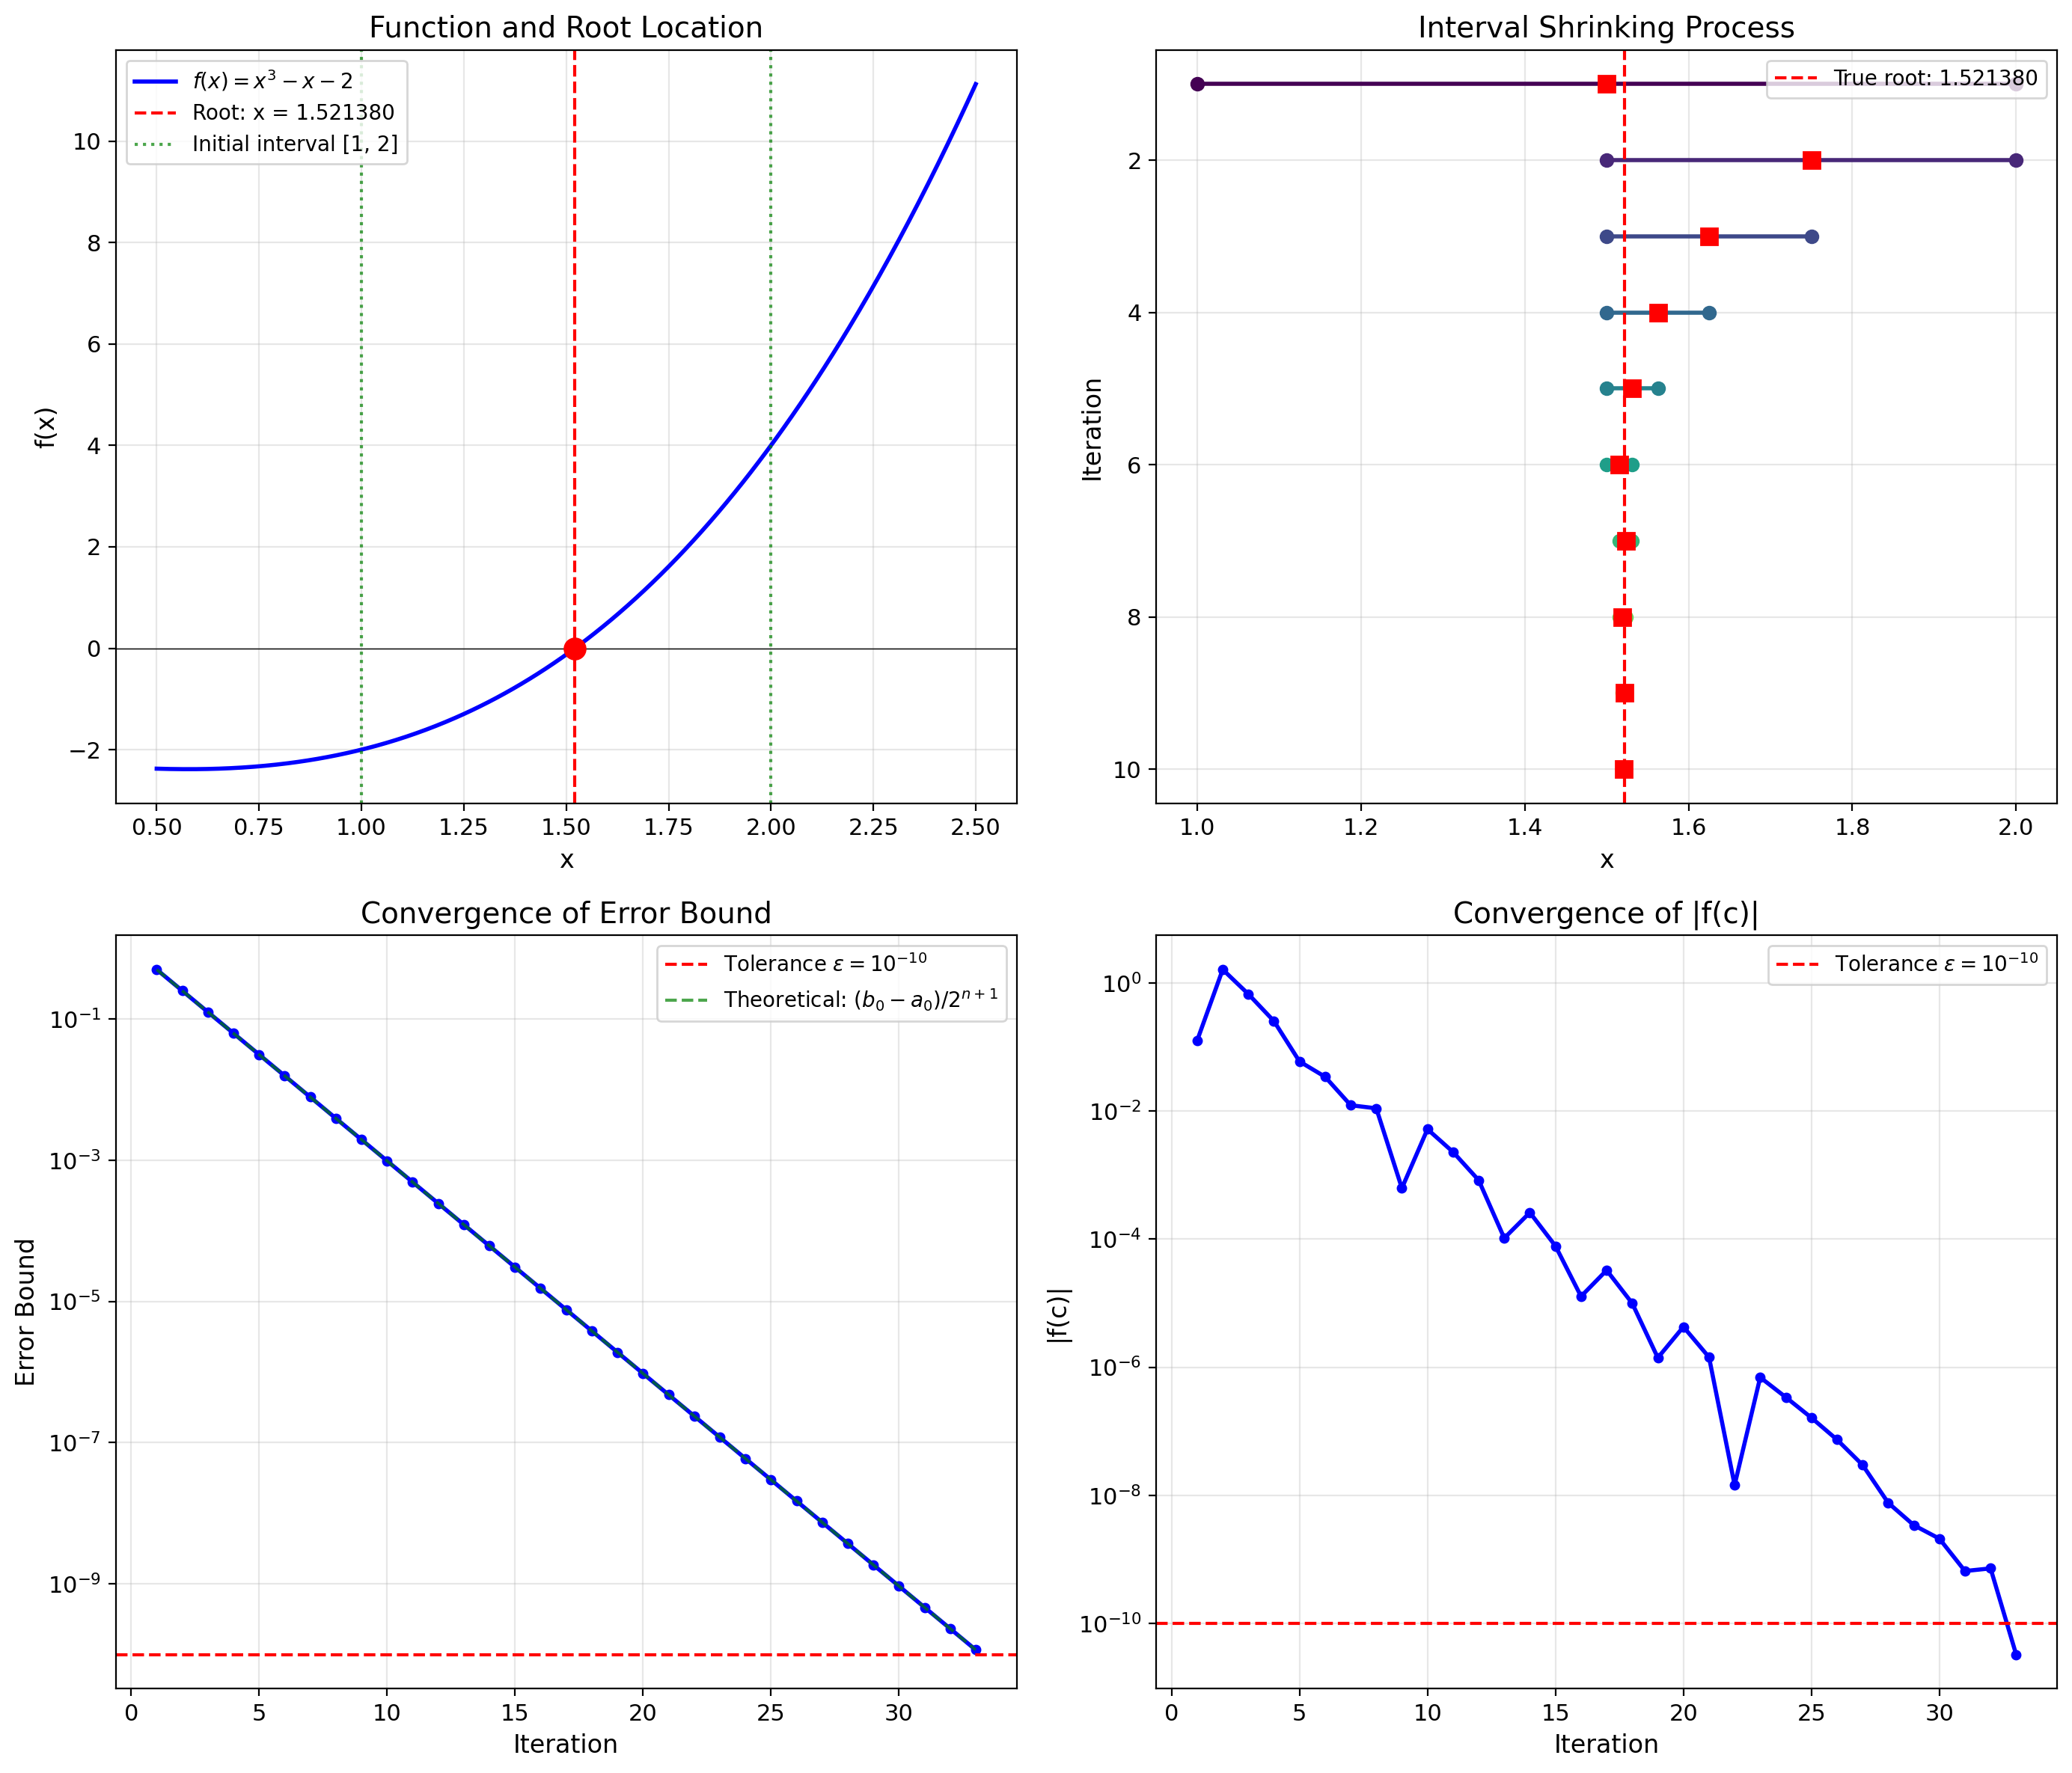


Plot saved to plot.png


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Function and root visualization
ax1 = axes[0, 0]
x = np.linspace(0.5, 2.5, 500)
y = f(x)

ax1.plot(x, y, 'b-', linewidth=2, label=r'$f(x) = x^3 - x - 2$')
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=root, color='r', linestyle='--', linewidth=1.5, label=f'Root: x = {root:.6f}')
ax1.plot(root, 0, 'ro', markersize=10)

# Mark initial interval
ax1.axvline(x=1, color='g', linestyle=':', alpha=0.7, label='Initial interval [1, 2]')
ax1.axvline(x=2, color='g', linestyle=':', alpha=0.7)

ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Function and Root Location')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Interval shrinking visualization
ax2 = axes[0, 1]

# Show first 10 iterations
n_show = min(10, len(history))
colors = plt.cm.viridis(np.linspace(0, 1, n_show))

for i, h in enumerate(history[:n_show]):
    ax2.plot([h['a'], h['b']], [i+1, i+1], 'o-', color=colors[i], 
             linewidth=2, markersize=6)
    ax2.plot(h['c'], i+1, 's', color='red', markersize=8)

ax2.axvline(x=root, color='r', linestyle='--', linewidth=1.5, 
            label=f'True root: {root:.6f}')
ax2.set_xlabel('x')
ax2.set_ylabel('Iteration')
ax2.set_title('Interval Shrinking Process')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.invert_yaxis()

# Plot 3: Error bound convergence (semi-log)
ax3 = axes[1, 0]
iterations = [h['iteration'] for h in history]
error_bounds = [h['error_bound'] for h in history]

ax3.semilogy(iterations, error_bounds, 'b-o', linewidth=2, markersize=4)
ax3.axhline(y=1e-10, color='r', linestyle='--', label=r'Tolerance $\epsilon = 10^{-10}$')

# Theoretical convergence
theoretical = [(b - a) / (2**(n+1)) for n in range(len(history))]
ax3.semilogy(iterations, theoretical, 'g--', linewidth=1.5, alpha=0.7,
             label=r'Theoretical: $(b_0-a_0)/2^{n+1}$')

ax3.set_xlabel('Iteration')
ax3.set_ylabel('Error Bound')
ax3.set_title('Convergence of Error Bound')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: |f(c)| convergence (semi-log)
ax4 = axes[1, 1]
f_values = [abs(h['f_c']) for h in history]

ax4.semilogy(iterations, f_values, 'b-o', linewidth=2, markersize=4)
ax4.axhline(y=1e-10, color='r', linestyle='--', label=r'Tolerance $\epsilon = 10^{-10}$')

ax4.set_xlabel('Iteration')
ax4.set_ylabel('|f(c)|')
ax4.set_title('Convergence of |f(c)|')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('bisection_method_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to plot.png")

## Additional Example: Transcendental Equation

Let's find the root of the transcendental equation:

$$g(x) = \cos(x) - x = 0$$

This equation arises in fixed-point theory and has a unique root in $[0, 1]$.

In [6]:
# Define transcendental function
def g(x):
    return np.cos(x) - x

# Apply bisection method
root_g, history_g = bisection_method(g, 0, 1, tol=1e-12)

print(f"Root of cos(x) - x = 0:")
print(f"x = {root_g:.15f}")
print(f"g(x) = {g(root_g):.2e}")
print(f"Iterations: {len(history_g)}")
print(f"\nThis is the Dottie number, a mathematical constant!")

Root of cos(x) - x = 0:
x = 0.739085133214758
g(x) = 6.74e-13
Iterations: 39

This is the Dottie number, a mathematical constant!


## Comparison: Required Iterations for Different Tolerances

We verify the theoretical formula for the number of iterations required.

In [7]:
# Compare actual vs theoretical iterations
tolerances = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]
a, b = 1.0, 2.0
interval_width = b - a

print(f"{'Tolerance':>12} {'Theoretical':>12} {'Actual':>8}")
print("-" * 36)

for tol in tolerances:
    # Theoretical number of iterations
    n_theory = np.ceil(np.log2(interval_width / tol) - 1)
    
    # Actual iterations
    _, hist = bisection_method(f, a, b, tol=tol)
    n_actual = len(hist)
    
    print(f"{tol:12.0e} {n_theory:12.0f} {n_actual:8d}")

   Tolerance  Theoretical   Actual
------------------------------------
       1e-02            6        7
       1e-04           13       14
       1e-06           19       20
       1e-08           26       27
       1e-10           33       33
       1e-12           39       39


## Conclusion

The bisection method is a fundamental root-finding algorithm that offers:

1. **Guaranteed convergence** for continuous functions with a sign change
2. **Predictable performance** - the number of iterations is known a priori
3. **Numerical stability** - immune to issues that plague gradient-based methods

While slower than Newton-Raphson (linear vs quadratic convergence), the bisection method remains valuable for:
- Providing reliable initial estimates for faster methods
- Solving problems where derivatives are unavailable or expensive
- Educational purposes as an introduction to numerical analysis

The theoretical error bound $\epsilon_n = (b_0 - a_0)/2^{n+1}$ matches our computational results, demonstrating the method's well-understood convergence behavior.